In [106]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [107]:
# Load .env environment variables
load_dotenv()

True

In [108]:
# Set alpaca api key and secret 
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [109]:
# Set the tickers
microsoft = ["MSFT"]

In [110]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [111]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-01", tz="America/New_York").isoformat()

In [112]:
# Get current closing prices for MSFT
df_microsoft = alpaca.get_bars(
    microsoft,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_microsoft

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-06-01 04:00:00+00:00,275,277.69,270.04,272.42,25108530,318649,273.328471,MSFT


In [113]:
# Format start and end dates as ISO format for five year period
start = pd.Timestamp("2017-06-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-06-01", tz="America/New_York").isoformat()

In [114]:
# Get closing prices for MSFT and TSLA from the five years
df_microsoft_daily = alpaca.get_bars(
    microsoft,
    timeframe,
    start = start,
    end = end,
    limit = 10000
).df

# Drop unneccesary columns
df_microsoft_daily = df_microsoft_daily.drop(["trade_count", "vwap"], axis=1)
# Display sample data
df_microsoft_daily

,open,high,low,close,volume,symbol
timestamp,,,,,,
2017-06-01 04:00:00+00:00,70.24,70.61,69.4510,70.10,21922908,MSFT
2017-06-02 04:00:00+00:00,70.44,71.86,70.2400,71.76,35470261,MSFT
2017-06-05 04:00:00+00:00,71.97,72.89,71.8100,72.28,33317996,MSFT
2017-06-06 04:00:00+00:00,72.30,72.62,72.2700,72.52,31511065,MSFT
2017-06-07 04:00:00+00:00,72.67,72.77,71.9500,72.39,22302769,MSFT
...,...,...,...,...,...,...
2022-05-25 04:00:00+00:00,258.36,264.58,257.1250,262.52,28402776,MSFT
2022-05-26 04:00:00+00:00,262.29,267.11,261.4294,265.90,24933202,MSFT
2022-05-27 04:00:00+00:00,268.51,273.34,267.5600,273.24,26809462,MSFT


In [115]:
# Reorganize the DataFrame
# Separate ticker data
#MSFT = df_portfolio_years[df_portfolio_years['symbol']=='MSFT'].drop('symbol', axis=1)
#TSLA = df_portfolio_years[df_portfolio_years['symbol']=='TSLA'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
#df_portfolio_years = pd.concat([MSFT, TSLA],axis=1, keys=['MSFT','TSLA'])
#df_portfolio_years

In [116]:
# For loop to input any stock to get alpaca stock data

def get_company(ticker, start, end, tradeapi):
    return alpaca.get_bars(
        ticker,
        TimeFrame.Day,
        start,
        end
    ).df


In [117]:
# Create a new df filtering the index and close columns
microsoft_signals_df = df_microsoft_daily.loc[:, ["close"]]

# Create a column for the daily returns
microsoft_signals_df["Actual Returns"] = df_microsoft_daily["close"].pct_change()

# Drop all NaN values from the DataFrame
microsoft_signals_df = microsoft_signals_df.dropna()

# Show signals df
display(microsoft_signals_df.head())
display(microsoft_signals_df.tail())

,close,Actual Returns
timestamp,,
2017-06-02 04:00:00+00:00,71.76,0.023680
2017-06-05 04:00:00+00:00,72.28,0.007246
2017-06-06 04:00:00+00:00,72.52,0.003320
2017-06-07 04:00:00+00:00,72.39,-0.001793
2017-06-08 04:00:00+00:00,71.95,-0.006078


,close,Actual Returns
timestamp,,
2022-05-25 04:00:00+00:00,262.52,0.011170
2022-05-26 04:00:00+00:00,265.90,0.012875
2022-05-27 04:00:00+00:00,273.24,0.027604
2022-05-31 04:00:00+00:00,271.87,-0.005014
2022-06-01 04:00:00+00:00,272.42,0.002023


In [118]:
# EWMA indicators
short_span = 8
long_span = 20
smooth_span = 4
df_microsoft_ewma = microsoft_signals_df.loc[:, ["close"]]
df_microsoft_ewma['8EWMA'] = df_microsoft_ewma['close'].ewm(span= short_span).mean()
df_microsoft_ewma['20EWMA'] = df_microsoft_ewma['close'].ewm(span= long_span).mean()
df_microsoft_ewma

,close,8EWMA,20EWMA
timestamp,,,
2017-06-02 04:00:00+00:00,71.76,71.760000,71.760000
2017-06-05 04:00:00+00:00,72.28,72.052500,72.033000
2017-06-06 04:00:00+00:00,72.52,72.248705,72.211823
2017-06-07 04:00:00+00:00,72.39,72.298226,72.263260
2017-06-08 04:00:00+00:00,71.95,72.190054,72.187485
...,...,...,...
2022-05-25 04:00:00+00:00,262.52,260.173906,266.336119
2022-05-26 04:00:00+00:00,265.90,261.446371,266.294584
2022-05-27 04:00:00+00:00,273.24,264.067178,266.956052


In [125]:
# Create column "Signal" such that if 8EWMA is gerater than 20EWMA then set sugnal to 1, else 
df_microsoft_ewma['Signal'] = 0.0
df_microsoft_ewma['Signal'] = np.where(df_microsoft_ewma['8EWMA'] > df_microsoft_ewma['20EWMA'], 1.0, 0.0
)

df_microsoft_ewma

,close,8EWMA,20EWMA,Signal
timestamp,,,,
2017-06-02 04:00:00+00:00,71.76,71.760000,71.760000,0.0
2017-06-05 04:00:00+00:00,72.28,72.052500,72.033000,1.0
2017-06-06 04:00:00+00:00,72.52,72.248705,72.211823,1.0
2017-06-07 04:00:00+00:00,72.39,72.298226,72.263260,1.0
2017-06-08 04:00:00+00:00,71.95,72.190054,72.187485,1.0
...,...,...,...,...
2022-05-25 04:00:00+00:00,262.52,260.173906,266.336119,0.0
2022-05-26 04:00:00+00:00,265.90,261.446371,266.294584,0.0
2022-05-27 04:00:00+00:00,273.24,264.067178,266.956052,0.0


In [127]:
# create a new column 'Position' which is a day-to-day difference of the 'Signal' column
df_microsoft_ewma['Position'] = df_microsoft_ewma['Signal'].diff()
df_microsoft_ewma

,close,8EWMA,20EWMA,Signal,Position
timestamp,,,,,
2017-06-02 04:00:00+00:00,71.76,71.760000,71.760000,0.0,NaN
2017-06-05 04:00:00+00:00,72.28,72.052500,72.033000,1.0,1.0
2017-06-06 04:00:00+00:00,72.52,72.248705,72.211823,1.0,0.0
2017-06-07 04:00:00+00:00,72.39,72.298226,72.263260,1.0,0.0
2017-06-08 04:00:00+00:00,71.95,72.190054,72.187485,1.0,0.0
...,...,...,...,...,...
2022-05-25 04:00:00+00:00,262.52,260.173906,266.336119,0.0,0.0
2022-05-26 04:00:00+00:00,265.90,261.446371,266.294584,0.0,0.0
2022-05-27 04:00:00+00:00,273.24,264.067178,266.956052,0.0,0.0


<AxesSubplot:xlabel='timestamp'>

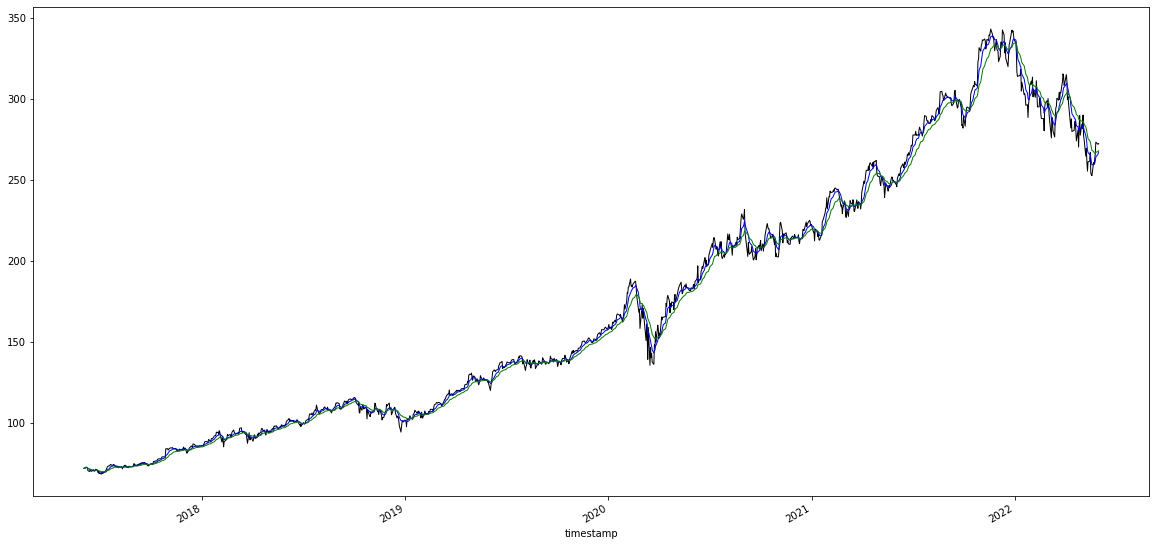

In [128]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_microsoft_ewma['close'].plot(color = 'k', lw = 1, label = 'close')  
df_microsoft_ewma['8EWMA'].plot(color = 'b', lw = 1, label = '8-day EWMA') 
df_microsoft_ewma['20EWMA'].plot(color = 'g', lw = 1, label = '20-day EWMA')

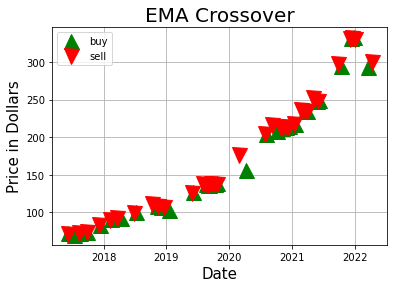

In [130]:
# plot ‘buy’ and 'sell' signals
plt.plot(df_microsoft_ewma[df_microsoft_ewma["Position"] == 1].index, 
         df_microsoft_ewma["8EWMA"][df_microsoft_ewma["Position"] == 1], 
         "^", markersize = 15, color = "g", label = 'buy')
plt.plot(df_microsoft_ewma[df_microsoft_ewma["Position"] == -1].index, 
         df_microsoft_ewma["8EWMA"][df_microsoft_ewma["Position"] == -1], 
         "v", markersize = 15, color = "r", label = 'sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('EWMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [131]:
df_microsoft_ewma

,close,8EWMA,20EWMA,Signal,Position
timestamp,,,,,
2017-06-02 04:00:00+00:00,71.76,71.760000,71.760000,0.0,NaN
2017-06-05 04:00:00+00:00,72.28,72.052500,72.033000,1.0,1.0
2017-06-06 04:00:00+00:00,72.52,72.248705,72.211823,1.0,0.0
2017-06-07 04:00:00+00:00,72.39,72.298226,72.263260,1.0,0.0
2017-06-08 04:00:00+00:00,71.95,72.190054,72.187485,1.0,0.0
...,...,...,...,...,...
2022-05-25 04:00:00+00:00,262.52,260.173906,266.336119,0.0,0.0
2022-05-26 04:00:00+00:00,265.90,261.446371,266.294584,0.0,0.0
2022-05-27 04:00:00+00:00,273.24,264.067178,266.956052,0.0,0.0


In [133]:
# Set initial capital
initial_capital = float(10000)

# Set the share size
share_size = 20

In [138]:
# Buy a 20 share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
df_microsoft_ewma['Position'] = share_size * df_microsoft_ewma['Signal']

# Determine the points in time where a 20 share position is bought or sold
df_microsoft_ewma['Entry/Exit Position'] = df_microsoft_ewma['Position'].diff()

# Multiply the close price by the number of shares held, or the Position
df_microsoft_ewma['Portfolio Holdings'] = df_microsoft_ewma['close'] * df_microsoft_ewma['Position']

# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
df_microsoft_ewma['Portfolio Cash'] = initial_capital - (df_microsoft_ewma['close'] * df_microsoft_ewma['Entry/Exit Position']).cumsum() 

# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
df_microsoft_ewma['Portfolio Total'] = df_microsoft_ewma['Portfolio Cash'] + df_microsoft_ewma['Portfolio Holdings']

# Calculate the portfolio daily returns
df_microsoft_ewma['Portfolio Daily Returns'] = df_microsoft_ewma['Portfolio Total'].pct_change()

# Calculate the portfolio cumulative returns
df_microsoft_ewma['Portfolio Cumulative Returns'] = (1 + df_microsoft_ewma['Portfolio Daily Returns']).cumprod() - 1

df_microsoft_ewma

,close,8EWMA,20EWMA,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
timestamp,,,,,,,,,,,
2017-06-02 04:00:00+00:00,71.76,71.760000,71.760000,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2017-06-05 04:00:00+00:00,72.28,72.052500,72.033000,1.0,20.0,20.0,1445.6,8554.4,10000.0,NaN,NaN
2017-06-06 04:00:00+00:00,72.52,72.248705,72.211823,1.0,20.0,0.0,1450.4,8554.4,10004.8,0.00048,0.00048
2017-06-07 04:00:00+00:00,72.39,72.298226,72.263260,1.0,20.0,0.0,1447.8,8554.4,10002.2,-0.00026,0.00022
2017-06-08 04:00:00+00:00,71.95,72.190054,72.187485,1.0,20.0,0.0,1439.0,8554.4,9993.4,-0.00088,-0.00066
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25 04:00:00+00:00,262.52,260.173906,266.336119,0.0,0.0,0.0,0.0,11246.8,11246.8,0.00000,0.12468
2022-05-26 04:00:00+00:00,265.90,261.446371,266.294584,0.0,0.0,0.0,0.0,11246.8,11246.8,0.00000,0.12468
2022-05-27 04:00:00+00:00,273.24,264.067178,266.956052,0.0,0.0,0.0,0.0,11246.8,11246.8,0.00000,0.12468
